In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hwk2-task2-salmon.ipynb")

# Task 2: Wrangling Alaska salmon catch data 

## Instructions 

- First, update the following cell to have a link to *your* Homework 2 GitHub repository:

**UPDATE THIS LINK**
https://github.com/marietolteca00/eds220-hwk2.git

- Review the [complete rubric for this task](https://docs.google.com/document/d/1x0BoU6IH4cnOR1-n7i9CYQ9wUC37yDpYlQ4j6rCfcsU/edit?tab=t.0) before starting.

- **Meaningful commits should be made every time you finish a major step.** We'll check your repository and view the commit history.

- **Every code cell should have a comment.** Err on the side of commenting too much for now. Comments should follow best practices.

- **Do not update the top cell with the `otter` import**, this is used internally for grading.

## Acknowledgments

This exercise is based on the [Cleaning and Wrangling Data in R lesson by the NCEAS Learning Hub](https://learning.nceas.ucsb.edu/2023-06-delta/session_11.html).


> Halina Do-Linh, Carmen Galaz García, Matthew B. Jones, Camila Vargas Poulsen. 2023. Open Science Synthesis training Week 1. NCEAS Learning Hub & Delta Stewardship Council.


## About the data

In this task you will use simplified data from the Alaska Department of Fish & Game containing commercial salmon catch data from 1878 to 1997. The original data can be accessed from the KNB repository:

> [Mike Byerly. (2016). Alaska commercial salmon catches by management region (1886-1997).](https://knb.ecoinformatics.org/view/df35b.304.2) Gulf of Alaska Data Portal. df35b.304.2.

The simplified dataset is in CSV format in the homework repository and has the following columns:

| Column | Description |
| ------ | ----------- | 
| Regions | Region code |
| Year | Year fish were caught |
| notesRegCode | Notes and comments |
| Species | Species of salmon caught |
| Catch | Commercial catches of salmon species (in thousands of fish) |

## COMPLETE WORKFLOW

You will use the next code cell to complete the last exercise in the task. Leave it blank for now. 

<Axes: title={'center': 'Commercial Average Salmon Catches by Region, from 1878 - 1997'}, xlabel='Catch (in thousands of fish)', ylabel='Region'>

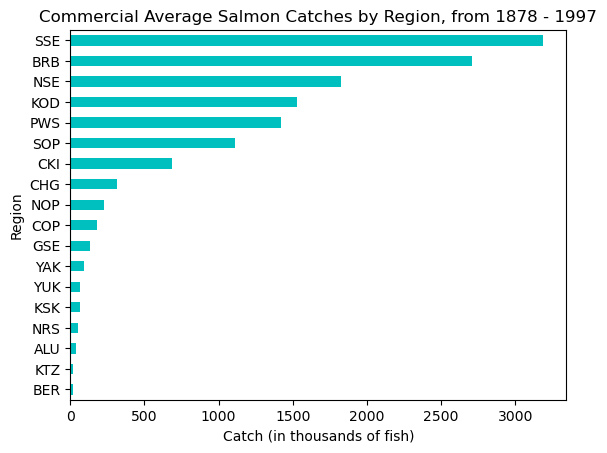

In [21]:
# FINAL CODE

# Import libaries
import pandas as pd
import numpy as numpy

# Read Data in
catch_data = pd.read_csv("data/salmon_data.csv")

# Attaching new catch column from prvious step to group by
catch_data['Catch'] = catch_data['Catch'].replace({'I':1}).astype('int64')

# Grouping by Region and get the average of catch
avg_region =catch_data.groupby('Region')['Catch'].mean().sort_values()

# Plot it !
avg_region.plot(kind = 'barh',
                # X - label
                xlabel = 'Catch (in thousands of fish)',
                # Set bar color
                color = 'c',
                # Title
               title = "Commercial Average Salmon Catches by Region, from 1878 - 1997")

## 1

a. Uset this code cell to import the data from the `salmon_data.csv` as `catch_data`. Look at the head of the dataframe. 

<!-- BEGIN QUESTION -->



In [3]:
# a.
# Importing packages
import pandas as pd
import numpy as numpy

# Importing Data csv
catch_data = pd.read_csv("data/salmon_data.csv")

# Viewing first 5 rows
catch_data.head()


,Region,Year,notesRegCode,Species,Catch
0,SSE,1886,NaN,Chinook,0
1,SSE,1887,NaN,Chinook,0
2,SSE,1888,NaN,Chinook,0
3,SSE,1889,NaN,Chinook,0
4,SSE,1890,NaN,Chinook,0


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

b. Use this code cell to make some other preliminary data exploration of your choosing.

In [4]:
# b. 
# Looking at header names only
catch_data.columns
# Viewing column values- to get an idea of the data
catch_data['Year'].unique()
catch_data['Species'].unique()
catch_data['Region'].unique()

#Looking at the total NA's in the columns 
catch_data.isna().sum()

# Look at total rows and columns
catch_data.shape

# Shows total rows in df
catch_data.shape[0]

# Shows total columns in df
catch_data.shape[1]

# Summary stats of df
catch_data.describe()

,Year
count,8540.000000
mean,1946.323185
std,30.341709
min,1878.000000
25%,1922.000000
50%,1947.000000
75%,1972.000000
max,1997.000000


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

c. Use this markdown cell to explain why you decided to do the exploration in c. and what information you obtained from doing it.

For the previous cell, I learned how many observations and variables the dataset contains, which columns may have missing data, and what the general scale and spread of numeric variables look like. For the shape of the data, it would help me when data cleaning, transformation, or feature selection occurs.

<!-- END QUESTION -->

## 2
In the next cell:

a. Store the unique values of the `notesRegCode` column in the `notes_unique` variable. 

In [5]:
# Retrieving unique values from 'notesRegCode' column, Shows notes without duplicates
notes_unique =catch_data['notesRegCode'].unique()
# Print output
print(notes_unique)

[nan 'Includes Yakutat catches' 'Yakutat catch included in No SE AK catch'
 'Estimated from canned production, probably sockeye' 'No fishery'
 'Bering River catches included in Copper River catches'
 'Includes Bering River catches; estimated from canned'
 'Includes Bering River catches'
 'Coho and pink catch estimated from canned production'
 'Includes Bering River; coho and pink estimated fro canned'
 'Pink catch estimated from canned'
 'Includes Bering River; coho pink and chum estimated from canned'
 'Includes Bering River; pink estimated from canned'
 'Includes Bering River; pink and chum estimated from canned'
 'Includes Copper River catches'
 'Includes Copper River catches; coho catch porbably mostly pinks'
 'Eshamy District only' 'Estimated from canned; excludes Resurrection Bay'
 'Estimated from canned production' 'No Resurrection Bay fishery'
 'Resurrection bay contribution estimated from canned production'
 'No reported catch'
 'Sockeye and pink and 9922 chum from Port Claren

In [6]:
grader.check("q2a")

q2a results: All test cases passed!

b. Update the dataframe so it doesn't include the `notesRegCode` column. Verify the column is no longer in the dataframe.

In [7]:
# Dropping 'notesRegCode' column
catch_data = catch_data.drop(columns =['notesRegCode'])
# Viewing dataframe to verfiy column has been dropped
catch_data.head()

,Region,Year,Species,Catch
0,SSE,1886,Chinook,0
1,SSE,1887,Chinook,0
2,SSE,1888,Chinook,0
3,SSE,1889,Chinook,0
4,SSE,1890,Chinook,0


In [8]:
grader.check("q2b")

q2b results: All test cases passed!

<!-- BEGIN QUESTION -->

## 3
Does each column have the expected data type? Use this code cell to obtain this information and write your answer in the next markdown cell.


Yes, these are the data types I was expecting, excpet for the 'Catch' column I assumed it would be an integer.

In [9]:
# Checking data types of each column
catch_data.dtypes


Region     object
Year        int64
Species    object
Catch      object
dtype: object

<!-- END QUESTION -->

## 4 
The following cell shows a first attempt at updating the `Catch` column to be of data type `int64` instead of `object`. Converting from one data type to another is often called **casting**. 

To do it we use the [`astype()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.astype.html) method for `pandas.Series`. The `astype()` method does not modify the `pandas.Series` in place.

Run the next cell and read the end of the error message closely.

In [10]:
catch_data['Catch'].astype('int64')

ValueError: invalid literal for int() with base 10: 'I'

## 5 

The previous error tells us there is a value 'I' (as in the letter 'I') that could not be converted to integer type.  It turns out the original data set was created from a PDF which was automatically converted into a CSV file and this 'I' vlaue should be 1.

In the next cell find the row(s) causing this issue. Show the filtered row(s) as the output. Store your answer in the `catch_I` variable. `catch_I` should have one observation and contain the following columns: Region, Year, Species, Catch. It should contain the original index number in order to pass the test. 

In [11]:
# Filter the row with that has the variable `I`
catch_I = catch_data[catch_data['Catch'] == 'I']
# View output
catch_I 

,Region,Year,Species,Catch
400,GSE,1955,Chinook,I


In [12]:
grader.check("q5")

q5 results: All test cases passed!

## 6
In the next cell:

1. Update the value of I to 1.
2. Access the row you updated to verify the value was changed and store this singe row in the `catch_1` variable. 

<!-- BEGIN QUESTION -->



In [13]:
# Replacing the values with 'I' to 1 in the Catch column using replace
catch_1 = catch_data['Catch'].replace({'I':1})  

# Print catch_1
catch_1[400] # using 400 since that is what came up in the previous code chunk

1

<!-- END QUESTION -->

## 7
In the next cell:

1. Update the `Catch` column in `catch_data` to be of type `int64`.
2. Confirm you have updated the data type. Store the type of the `catch` column in the `catch_column_type` variable.

In [14]:
# Using replace and using '.astype' to switch column from object to an int64
catch_column_type = catch_data['Catch'].replace({'I':1}).astype('int64').dtype
# Printing out dataframe and checking dtype to verify switch
catch_column_type


dtype('int64')

In [15]:
grader.check("q7")

q7 results: All test cases passed!

<!-- BEGIN QUESTION -->

## 8
Create a data frame with the average salmon catch per region. HINT: use `groupby()`. Store your dataframe in new variable called `avg_region`


In [16]:
# Attaching new catch column from prvious step to group by
catch_data['Catch'] = catch_data['Catch'].replace({'I':1}).astype('int64')
# Checking the type has changed from 'object' to 'int64'
catch_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8540 entries, 0 to 8539
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Region   8540 non-null   object
 1   Year     8540 non-null   int64 
 2   Species  8540 non-null   object
 3   Catch    8540 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 267.0+ KB


In [17]:
# Grouping by Region and get the average of Catch
avg_region =catch_data.groupby('Region')['Catch'].mean().sort_values()
# Check output
avg_region

Region
BER      16.372549
KTZ      18.836145
ALU      40.383908
NRS      51.502703
KSK      67.642353
YUK      68.645570
YAK      91.922917
GSE     133.841463
COP     179.223404
NOP     229.493478
CHG     315.487273
CKI     683.571429
SOP    1110.942222
PWS    1419.236697
KOD    1528.350000
NSE    1825.020870
BRB    2709.796491
SSE    3184.660714
Name: Catch, dtype: float64

In [18]:
grader.check("q8")

q8 results: All test cases passed!

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## 9 

Use the dataframe you created in 8 to make a bar graph of the estimated average salmon catches by region from 1878 to 1997. The bars in the graph should be ordered by magnitude (increasing or decreasing is ok). Add a title  to your graph and update the axes labels if needed (check the units for the salmon catch). 

<Axes: title={'center': 'Commercial Average Salmon Catches by Region, from 1878 - 1997'}, xlabel='Catch (in thousands of fish)', ylabel='Region'>

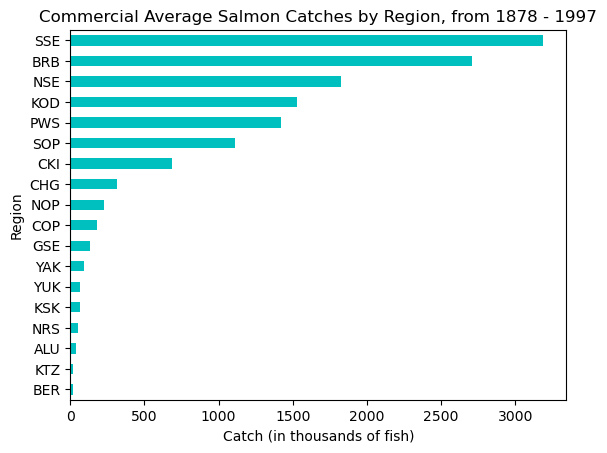

In [19]:
# Plot it !
avg_region.plot(kind = 'barh',
                # X - label
                xlabel = 'Catch (in thousands of fish)',
                # Set bar color
                color = 'c',
                # Title
               title = "Commercial Average Salmon Catches by Region, from 1878 - 1997")


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## 10

Write a brief description with key takeaways from the plot. Your answer shuld use the complete names for the management areas instead of their codes. You can find what each code stands for in the [original data repository](https://knb.ecoinformatics.org/view/df35b.304.2#df35b.303.1).

From the barplot figure above, the top three (Southern Southeast Alaska,SSE, (average catch = 3184.66), Bristol Bay Management Area, BRB, (average catch = 2709.80), and Northern Southeast Alaska,NSE, location(average catch = 1825.02)), could differ from different water temperatures or elevation that affects the presence of salmon. Compared to Bering River Subarea Copper River (average catch = 16.37), where it seems to be located in Gulf of Alaska.

<!-- END QUESTION -->

## 11

Collect all the relevant code into the first blank cell of the notebook titled "COMPLETE WORKFLOW". This single cell will have the end-to-end workflow: from importing libraries and loading the data, to producing the graph. The *only* ouput of this cell should be the graph you produced in the previous exercise. Further guidance on what to include in this final workflow is in the [assignment rubric](https://docs.google.com/document/d/1x0BoU6IH4cnOR1-n7i9CYQ9wUC37yDpYlQ4j6rCfcsU/edit?tab=t.0).

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [20]:
grader.check_all()

q2a results: All test cases passed!

q2b results: All test cases passed!

q5 results: All test cases passed!

q7 results: All test cases passed!

q8 results: All test cases passed!